# Nhóm 13
Tên thành viên:\
Lê Trọng Nghĩa (Nhóm trưởng): Data crawling, Casual inference\
Lê Viết Tố Khoa: Data preprocessing, using model to extract language into nutritional value\
Nguyễn Thiên Phúc: Calculating target feature\
Bành Đức Khánh:Hypothesis testing and data visualize\
Lê Hoàng Nguyên: Report writing, casual inference and presenter


#Le Trong Nghia
Getting ingredients info from tasty.com using the recipe url collected from using parsehub app.



In [11]:
import csv
import requests
from bs4 import BeautifulSoup
#Function to read and write data to csv
def read_csv(file_path):
    data = []
    with open(file_path, mode='r', newline='') as file:
        reader = csv.reader(file)
        header = next(reader)  # Skip the header
        for row in reader:
            data.append(row)
    return data

def write_csv(file_path, data, header):
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
        writer.writerows(data)

In [ ]:


def get_ingredients_from_url(url):
    response = requests.get(url)

    # Kiem tra link co tra ve ket qua khong
    if response.status_code != 200:
        print(f"Failed to retrieve the recipe webpage: {url}")
        return None

    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract ingredients (adjust the selector based on the website's structure)
    ingredients = []
    ingredient_elements = soup.select('div.ingredients__section li')
    for ingredient in ingredient_elements:
        ingredients.append(ingredient.get_text().strip())

    return ingredients


# File paths
input_csv_path = 'animaldata.csv'
output_csv_path = 'ingredients_animal_output.csv'

# Read input CSV
recipes = read_csv(input_csv_path)

# Fetch ingredients for each recipe
results = []
ingredients_string = ""
for name, url in recipes:
    ingredients = get_ingredients_from_url(url)
    if ingredients:
        ingredients_str = ', '.join(ingredients)
        results.append([name, ingredients_str])
        ingredients_string += f"{name}: {ingredients_str}\n"

# Write output CSV
write_csv(output_csv_path, results, ['name', 'ingredients'])

# Print ingredients string
print("Ingredients for all recipes:")
print(ingredients_string)

print(f"Ingredients have been written to {output_csv_path}")


In [ ]:
def get_ingredients_from_url(url):
    # Fetch the recipe page
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code != 200:
        print(f"Failed to retrieve the recipe webpage: {url}")
        return None

    # Parse the recipe page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract ingredients (adjust the selector based on the website's structure)
    ingredients = []
    ingredient_elements = soup.select('div.ingredients__section li')
    for ingredient in ingredient_elements:
        ingredients.append(ingredient.get_text().strip())

    return ingredients

# File paths
input_csv_path = 'plantdata.csv'
output_csv_path = 'ingredients_plant_output.csv'

# Read input CSV
recipes = read_csv(input_csv_path)

# Fetch ingredients for each recipe
results = []
ingredients_string = ""
for name, url in recipes:
    ingredients = get_ingredients_from_url(url)
    if ingredients:
        ingredients_str = ', '.join(ingredients)
        results.append([name, ingredients_str])
        ingredients_string += f"{name}: {ingredients_str}\n"

# Write output CSV
write_csv(output_csv_path, results, ['name', 'ingredients'])

# Print ingredients string
print("Ingredients for all recipes:")
print(ingredients_string)

print(f"Ingredients have been written to {output_csv_path}")

#Lê Viết Tố Khoa

In [1]:
import pandas as pd
import requests
import json
### PLANT-BASED FOOD

# Read the CSV file from the provided URL
url = "https://raw.githubusercontent.com/lvtkhoa/ingredients_of_foods/main/ingredients_output-1.csv"
df = pd.read_csv(url)

# API endpoint and headers
api_url = 'https://api.calorieninjas.com/v1/nutrition?query='

# Function to make API requests for each ingredient
def get_nutrients_data(ingredient):
    query = ingredient
    response = requests.get(api_url + query, headers={'X-Api-Key': 'ex2cdapbOTl5BGBLQpVDtw==9eW8y1uc1oHtdiHL'})
    if response.status_code == requests.codes.ok:
        return response.json()
    else:
        return None




# Create a list of API responses for each ingredient
responses = [get_nutrients_data(ingredient) for ingredient in df['ingredients']]

new_df = pd.DataFrame({'name': df['name'], 'response': responses})

df_filtered = new_df.dropna(subset=['response'])

df_filtered['ingredients'] = df_filtered['response'].apply(lambda x: x['items'])

# Hàm tính tổng giá trị dinh dưỡng của từng loại dưỡng chất trên một khẩu phần ăn 100 gram
def calculate_sum_each_nutrition(nutrition, ingredients):
    total_nutrition = 0
    total_serving_size = 0
    for i in ingredients:
        total_nutrition += i[nutrition]
        total_serving_size += i['serving_size_g']
    if total_serving_size != 0:
        return total_nutrition / (total_serving_size/100)
    else:
        return 0


calculated_plant_food_df = df_filtered.copy()
calculated_plant_food_df['calories'] = calculated_plant_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('calories', ingredients))
calculated_plant_food_df['sugar_g'] = calculated_plant_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('sugar_g', ingredients))
calculated_plant_food_df['fiber_g'] = calculated_plant_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('fiber_g', ingredients))
calculated_plant_food_df['sodium_mg'] = calculated_plant_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('sodium_mg', ingredients))
calculated_plant_food_df['potassium_mg'] = calculated_plant_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('potassium_mg', ingredients))
calculated_plant_food_df['fat_saturated_g'] = calculated_plant_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('fat_saturated_g', ingredients))
calculated_plant_food_df['fat_total_g'] = calculated_plant_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('fat_total_g', ingredients))
calculated_plant_food_df['cholesterol_mg'] = calculated_plant_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('cholesterol_mg', ingredients))
calculated_plant_food_df['protein_g'] = calculated_plant_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('protein_g', ingredients))
calculated_plant_food_df['carbohydrates_total_g'] = calculated_plant_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('carbohydrates_total_g', ingredients))
calculated_plant_food_df.drop('response', axis=1, inplace=True)
calculated_plant_food_df.drop('ingredients', axis=1, inplace=True)


calculated_plant_food_df


KeyboardInterrupt: 

In [ ]:
calculated_plant_food_df.to_csv('calculated_plant_food_df.csv', index=False)

In [2]:
import pandas as pd
import requests
import json
### MEAT-BASED FOOD

# Read the CSV file from the provided URL
url = "https://raw.githubusercontent.com/lvtkhoa/ingredients_of_foods/main/ingredients_animal_output.csv"
df = pd.read_csv(url)

# API endpoint and headers
api_url = 'https://api.calorieninjas.com/v1/nutrition?query='

# Function to make API requests for each ingredient
def get_nutrients_data(ingredient):
    query = ingredient
    response = requests.get(api_url + query, headers={'X-Api-Key': 'ex2cdapbOTl5BGBLQpVDtw==9eW8y1uc1oHtdiHL'})
    if response.status_code == requests.codes.ok:
        return response.json()
    else:
        return None




# Create a list of API responses for each ingredient
responses = [get_nutrients_data(ingredient) for ingredient in df['ingredients']]

new_df = pd.DataFrame({'name': df['name'], 'response': responses})

df_filtered = new_df.dropna(subset=['response'])

df_filtered['ingredients'] = df_filtered['response'].apply(lambda x: x['items'])

# Hàm tính tổng giá trị dinh dưỡng của từng loại dưỡng chất trên một khẩu phần ăn 100 gram
def calculate_sum_each_nutrition(nutrition, ingredients):
    total_nutrition = 0
    total_serving_size = 0
    for i in ingredients:
        total_nutrition += i[nutrition]
        total_serving_size += i['serving_size_g']
    if total_serving_size != 0:
        return total_nutrition / (total_serving_size/100)
    else:
        return 0


calculated_meat_food_df = df_filtered.copy()
calculated_meat_food_df['calories'] = calculated_meat_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('calories', ingredients))
calculated_meat_food_df['sugar_g'] = calculated_meat_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('sugar_g', ingredients))
calculated_meat_food_df['fiber_g'] = calculated_meat_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('fiber_g', ingredients))
calculated_meat_food_df['sodium_mg'] = calculated_meat_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('sodium_mg', ingredients))
calculated_meat_food_df['potassium_mg'] = calculated_meat_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('potassium_mg', ingredients))
calculated_meat_food_df['fat_saturated_g'] = calculated_meat_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('fat_saturated_g', ingredients))
calculated_meat_food_df['fat_total_g'] = calculated_meat_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('fat_total_g', ingredients))
calculated_meat_food_df['cholesterol_mg'] = calculated_meat_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('cholesterol_mg', ingredients))
calculated_meat_food_df['protein_g'] = calculated_meat_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('protein_g', ingredients))
calculated_meat_food_df['carbohydrates_total_g'] = calculated_meat_food_df['ingredients'].apply(lambda ingredients: calculate_sum_each_nutrition('carbohydrates_total_g', ingredients))
calculated_meat_food_df.drop('response', axis=1, inplace=True)
calculated_meat_food_df.drop('ingredients', axis=1, inplace=True)


calculated_meat_food_df


KeyboardInterrupt: 

#Nguyễn Thiên Phúc

In [19]:
import pandas as pd
calculated_plant_food_df = pd.read_csv('calculated_plant_food_df.csv')
calculated_meat_food_df = pd.read_csv('calculated_meat_food_df.csv')

calculated_plant_food_df['food_type'] = 'Plant-Based'
calculated_meat_food_df['food_type'] = 'Animal-Based'

combined_nutrition = pd.concat([calculated_plant_food_df, calculated_meat_food_df], ignore_index=True)
combined_summary = combined_nutrition.describe()
summary_by_food_type = combined_nutrition.groupby('food_type').describe()

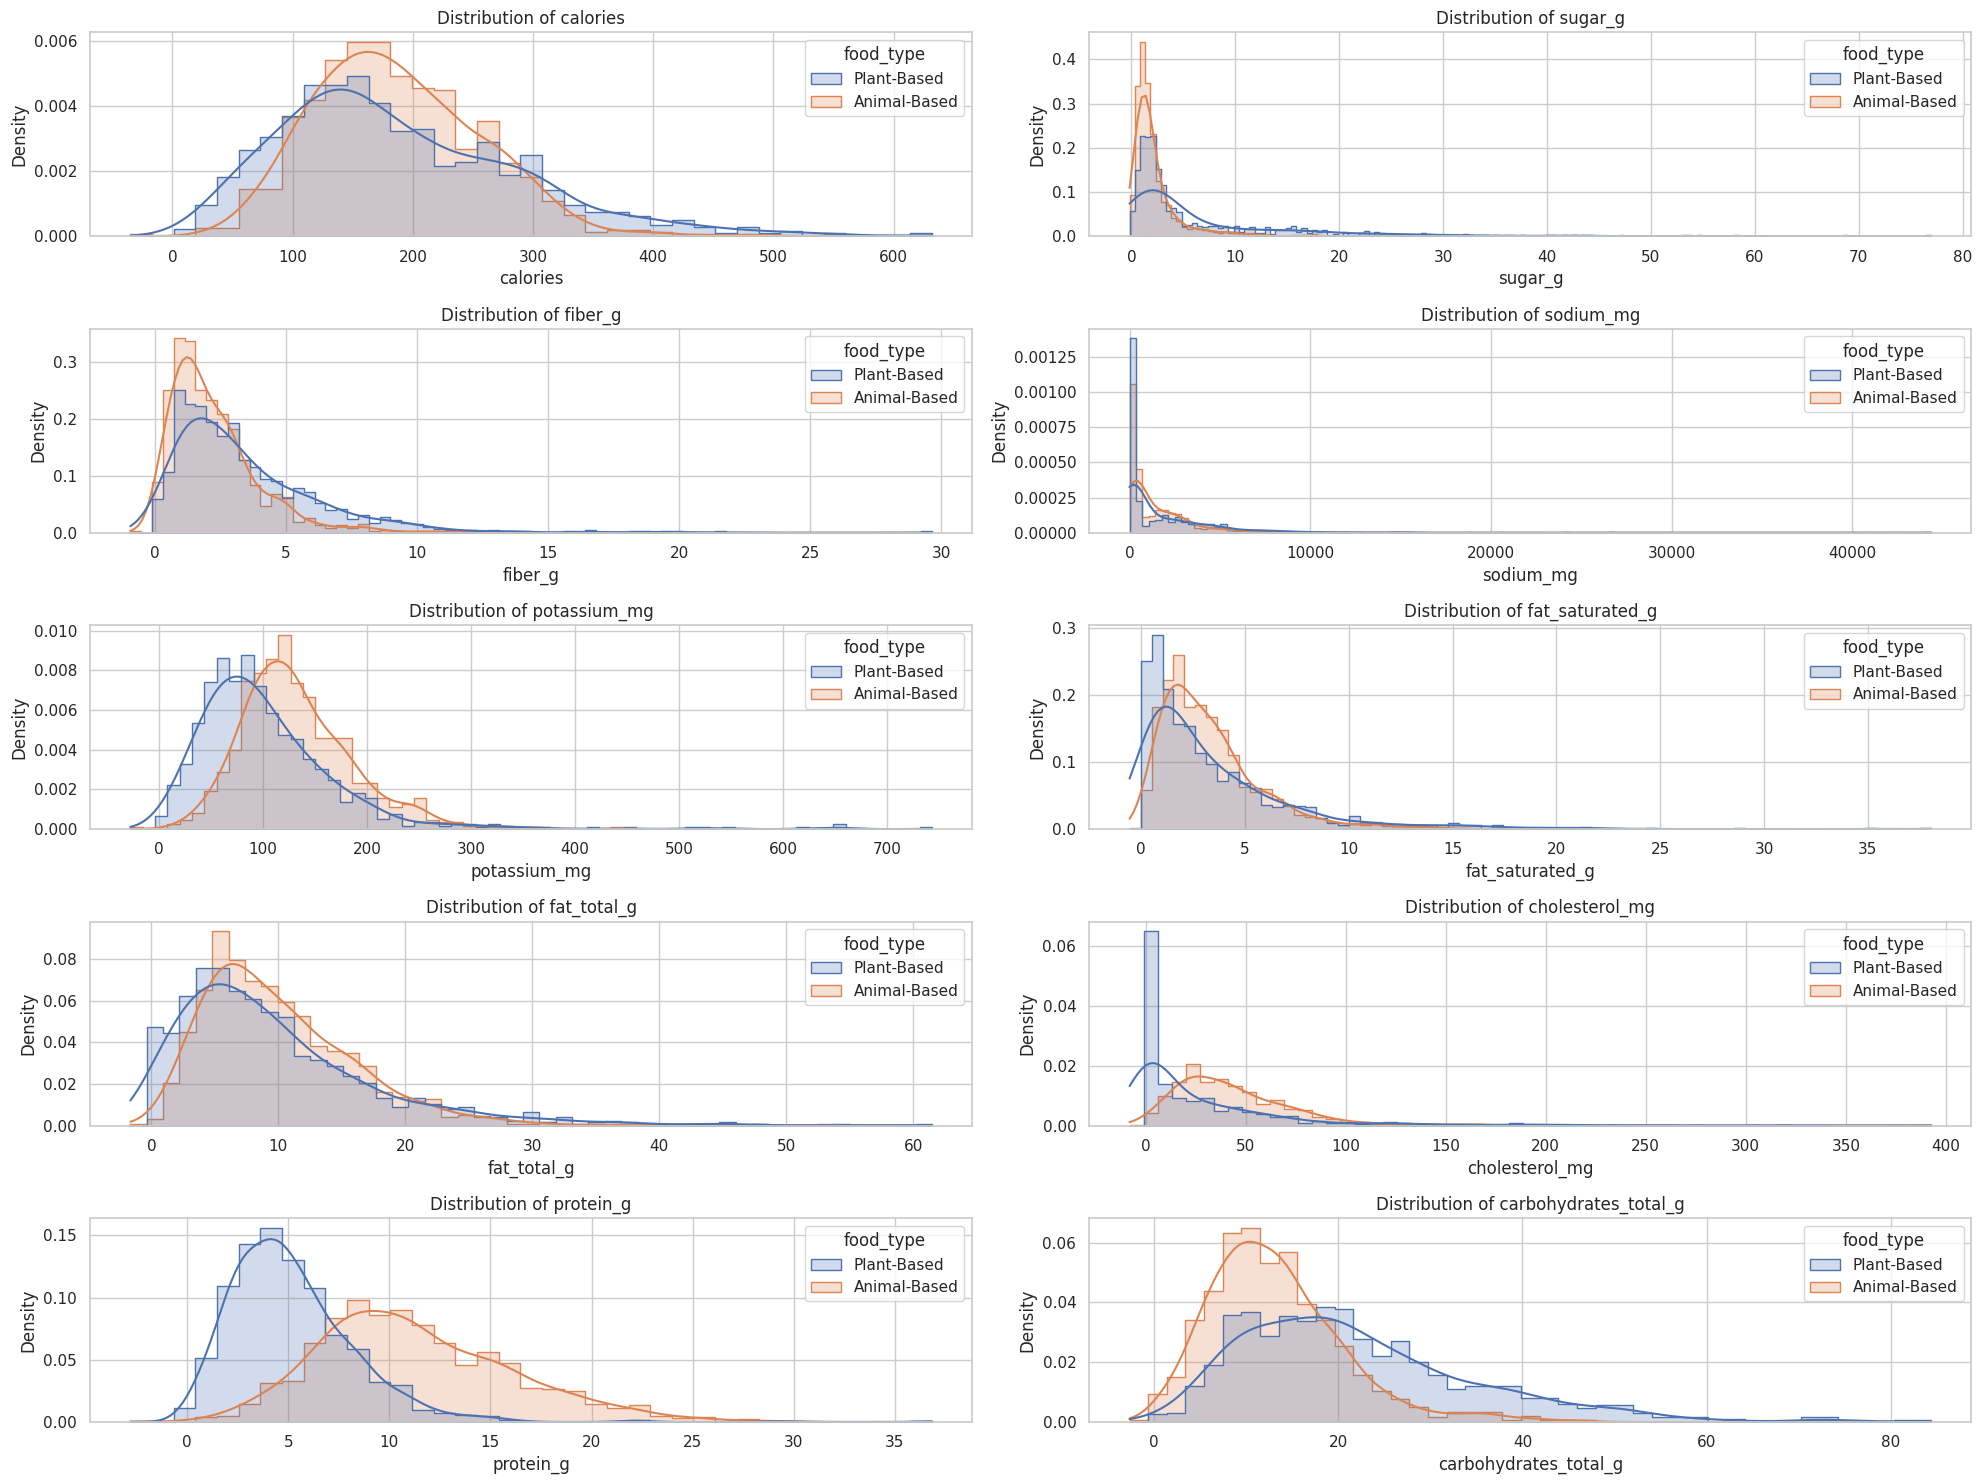

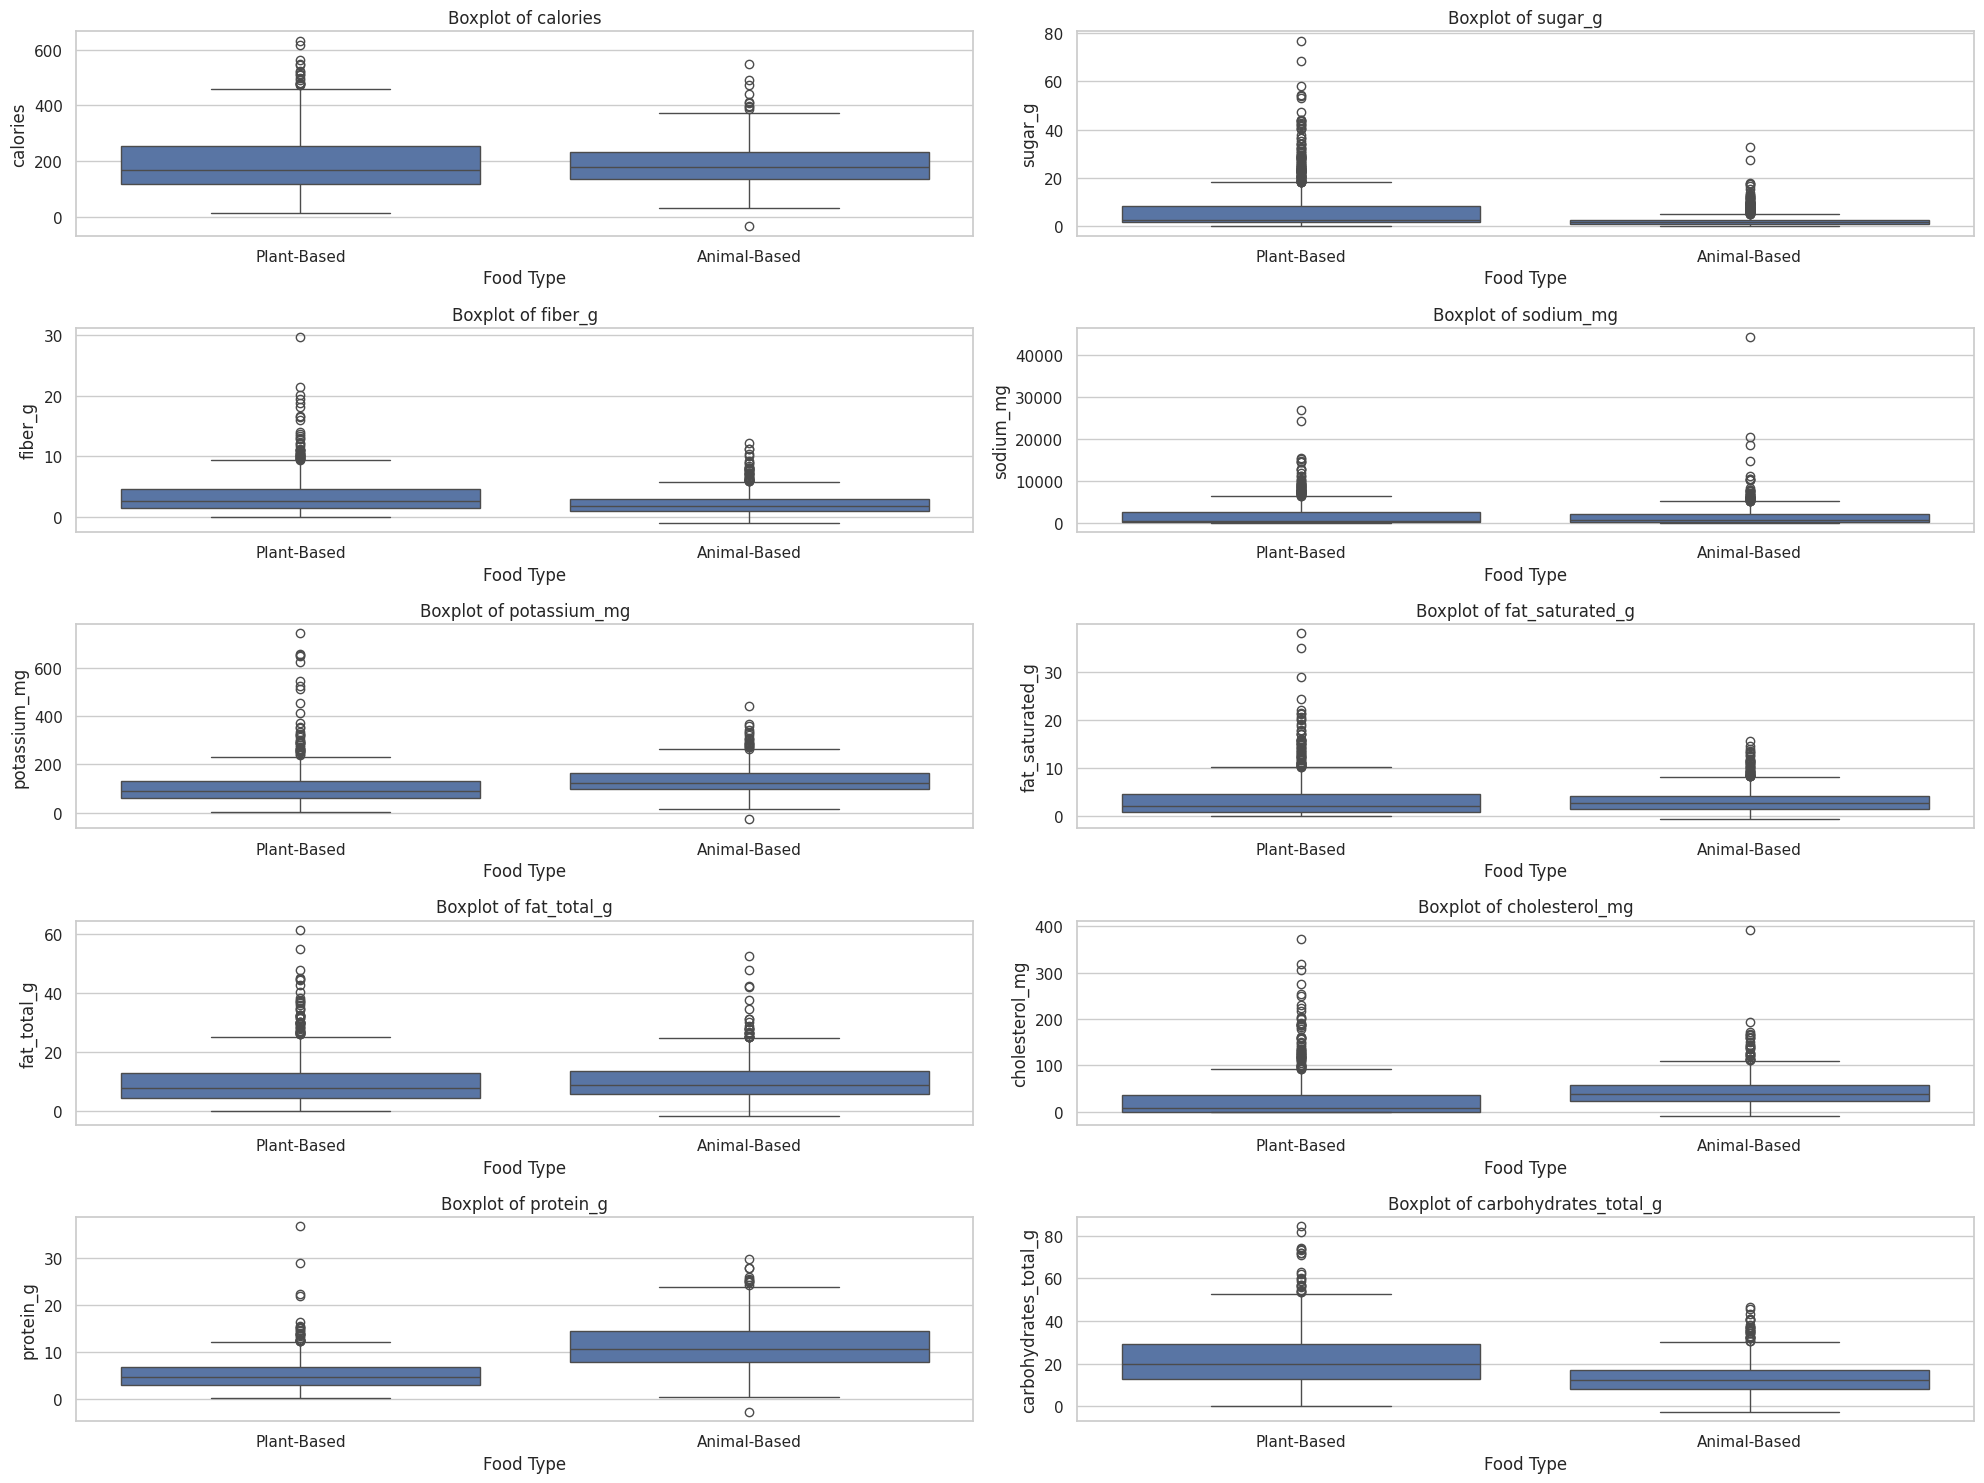

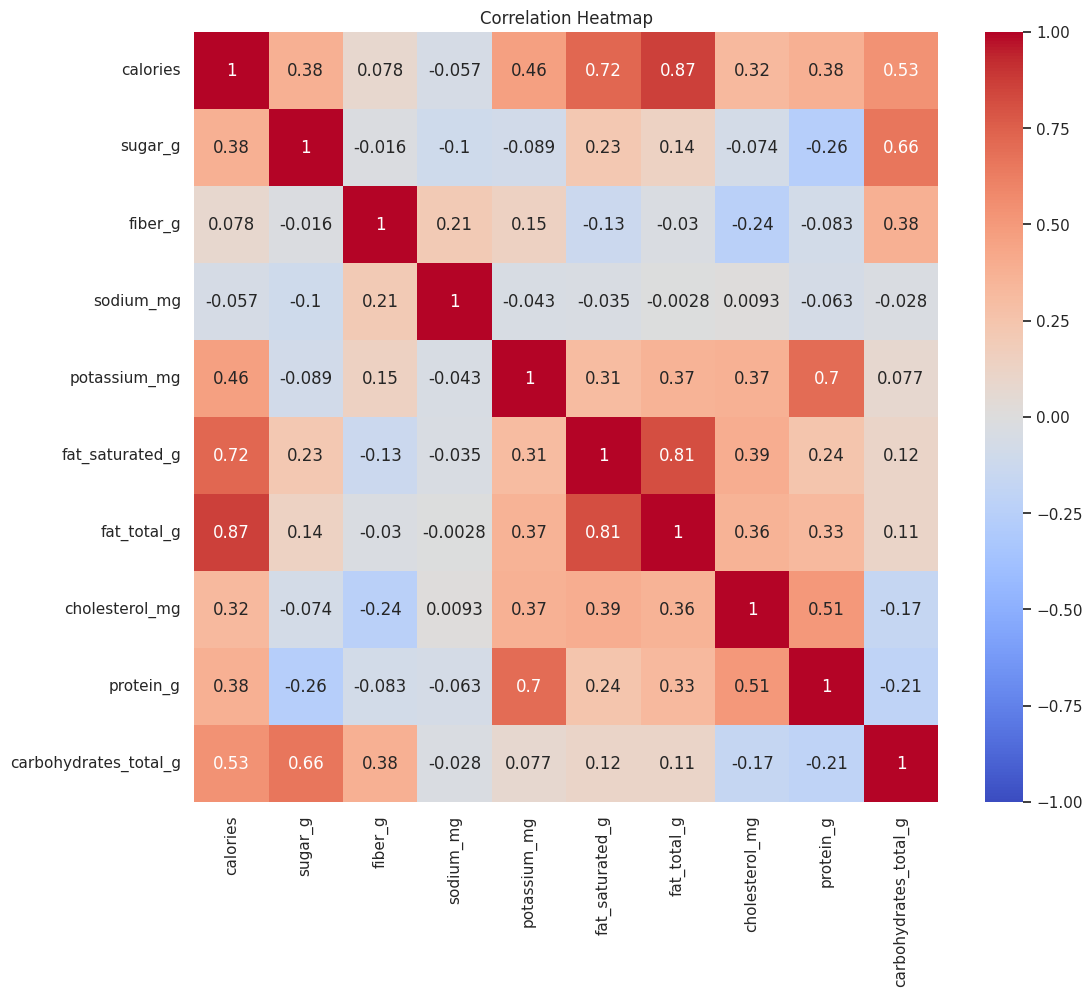

In [22]:
# List of key nutritional variables
key_variables = ['calories', 'sugar_g', 'fiber_g', 'sodium_mg', 'potassium_mg', 'fat_saturated_g', 'fat_total_g', 'cholesterol_mg', 'protein_g', 'carbohydrates_total_g']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Histograms for key variables
for i, var in enumerate(key_variables):
    plt.subplot(5, 2, i+1)
    sns.histplot(data=combined_nutrition, x=var, hue='food_type', kde=True, element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Boxplots for comparing plant-based and meat-based foods
plt.figure(figsize=(20, 15))

for i, var in enumerate(key_variables):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x='food_type', y=var, data=combined_nutrition)
    plt.title(f'Boxplot of {var}')
    plt.xlabel('Food Type')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = combined_nutrition[key_variables].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Sugar (sugar_g): High intake of added sugars can lead to weight gain, type 2 diabetes, and heart disease. Therefore, it should have a significant negative weight.\
Fiber (fiber_g): Dietary fiber is important for digestive health and can help prevent heart disease, diabetes, and obesity. A high fiber content should have a positive weight.\
Sodium (sodium_mg): Excess sodium intake can increase blood pressure and the risk of heart disease and stroke. This should have a significant negative weight.\
Potassium (potassium_mg): Potassium helps to counteract the negative effects of sodium and is essential for heart and muscle function. It should have a positive weight.\
Saturated Fat (fat_saturated_g): High intake of saturated fats can raise cholesterol levels and increase the risk of heart disease. This should have a significant negative weight.\
Total Fat (fat_total_g): While some fats are necessary, excessive fat intake can lead to obesity and related diseases. This should have a moderate negative weight.\
Cholesterol (cholesterol_mg): High cholesterol intake can contribute to heart disease. This should have a moderate negative weight.\
Protein (protein_g): Protein is essential for building and repairing tissues. It should have a positive weight, though it’s important not to overemphasize it as excessive protein can also have health impacts.\
Total Carbohydrates (carbohydrates_total_g): Carbohydrates are a major energy source, but the quality of carbohydrates (e.g., complex vs. simple) is important. This should have a neutral to slightly negative weight, adjusted for quality.\



In [3]:
# The reason I choose negative weight because I also considered how exceeding nutrition daily need affects general health
#Baseline for comparing hypothesis
def calculate_health_score_inital(row):
    temp = row['calories']

    # Sugar
    if row['sugar_g'] < temp * 0.1:
        a = 0.05
        if row['sugar_g'] < temp * 0.05:
            a = 0.1
    else:
        a = -0.1

    # Fiber
    if row['fiber_g'] * 8 < 9:
        b = -0.1
    else:
        b = 0.1

    # Sodium
    if row['sodium_mg'] * 8 < 800:
        c = 0.05
    else:
        c = -0.1

    # Potassium
    potassium_8 = row['potassium_mg'] * 8
    if 800 < potassium_8 < 1000:
        d = 0.1
    elif potassium_8 < 100:
        d = -0.1
    else:
        d = 0

    # Saturated Fat
    if row['fat_saturated_g'] < temp * 0.1:
        e = 0.05
    else:
        e = -0.1

    # Total Fat
    if row['fat_total_g'] < temp * 0.3:
        f = 0.05
    else:
        f = -0.1

    # Cholesterol
    if row['cholesterol_mg'] < 300:
        g = 0.05
    else:
        g = -0.1

    # Protein
    protein_8 = row['protein_g'] * 8
    if 50 < protein_8 < 65:
        h = 0.1
    else:
        h = 0

    # Carbohydrates
    carbohydrates_8 = row['carbohydrates_total_g'] * 8
    if 85 < carbohydrates_8 < 115:
        j = 0.1
    else:
        j = 0

    return (row['sugar_g'] * a +
            row['fiber_g'] * b +
            row['sodium_mg'] * c +
            row['potassium_mg'] * d +
            row['fat_saturated_g'] * e +
            row['fat_total_g'] * f +
            row['cholesterol_mg'] * g +
            row['protein_g'] * h +
            row['carbohydrates_total_g'] * j)

Weighting value is different for each hypothesis.

In [4]:
# Hypothesis 1: People losing weight should eat plant-based foods
# Weight loss: High emphasis on protein and fiber, low emphasis on calories and fat.\
def calculate_health_score_H1(row):
    # Calories
    if row['calories'] < 200:
        calories_weight = 0.2
    elif 200 <= row['calories'] <= 300:
        calories_weight = 0
    else:
        calories_weight = -0.2

    # Sugar
    if row['sugar_g'] < 5:
        sugar_weight = 0.1
    elif 5 <= row['sugar_g'] <= 10:
        sugar_weight = 0
    else:
        sugar_weight = -0.2

    # Fiber
    if row['fiber_g'] > 5:
        fiber_weight = 0.2
    elif 2 <= row['fiber_g'] <= 5:
        fiber_weight = 0.1
    else:
        fiber_weight = 0

    # Sodium
    if row['sodium_mg'] < 200:
        sodium_weight = 0.05
    elif 200 <= row['sodium_mg'] <= 400:
        sodium_weight = 0
    else:
        sodium_weight = -0.1

    # Potassium
    if row['potassium_mg'] > 400:
        potassium_weight = 0.05
    elif 200 <= row['potassium_mg'] <= 400:
        potassium_weight = 0
    else:
        potassium_weight = -0.05

    # Saturated Fat
    if row['fat_saturated_g'] < 2:
        saturated_fat_weight = 0.1
    elif 2 <= row['fat_saturated_g'] <= 5:
        saturated_fat_weight = 0
    else:
        saturated_fat_weight = -0.1

    # Total Fat
    if row['fat_total_g'] < 10:
        total_fat_weight = 0.1
    elif 10 <= row['fat_total_g'] <= 20:
        total_fat_weight = 0
    else:
        total_fat_weight = -0.2

    # Cholesterol
    if row['cholesterol_mg'] < 100:
        cholesterol_weight = 0.05
    elif 100 <= row['cholesterol_mg'] <= 200:
        cholesterol_weight = 0
    else:
        cholesterol_weight = -0.1

    # Protein
    if row['protein_g'] > 10:
        protein_weight = 0.1
    elif 5 <= row['protein_g'] <= 10:
        protein_weight = 0
    else:
        protein_weight = -0.05

    # Carbohydrates
    if 15 <= row['carbohydrates_total_g'] <= 30:
        carbohydrates_weight = 0.1
    elif 30 < row['carbohydrates_total_g'] <= 50:
        carbohydrates_weight = 0
    else:
        carbohydrates_weight = -0.1

    return (row['calories'] * calories_weight +
            row['sugar_g'] * sugar_weight +
            row['fiber_g'] * fiber_weight +
            row['sodium_mg'] * sodium_weight +
            row['potassium_mg'] * potassium_weight +
            row['fat_saturated_g'] * saturated_fat_weight +
            row['fat_total_g'] * total_fat_weight +
            row['cholesterol_mg'] * cholesterol_weight +
            row['protein_g'] * protein_weight +
            row['carbohydrates_total_g'] * carbohydrates_weight)


In [5]:
# Hypothesis 2: People who need to gain muscle should eat animal-based foods
# Muscle gain: High emphasis on protein and complex carbs, moderate emphasis on healthy fats.
def calculate_health_score_H2(row):
    # Calories
    if row['calories'] > 300:
        calories_weight = 0.2
    elif 200 <= row['calories'] <= 300:
        calories_weight = 0
    else:
        calories_weight = -0.2

    # Sugar
    if row['sugar_g'] < 5:
        sugar_weight = 0.05
    elif 5 <= row['sugar_g'] <= 10:
        sugar_weight = 0
    else:
        sugar_weight = -0.1

    # Fiber
    if row['fiber_g'] > 5:
        fiber_weight = 0
    elif 2 <= row['fiber_g'] <= 5:
        fiber_weight = 0.05
    else:
        fiber_weight = -0.05

    # Sodium
    if row['sodium_mg'] < 200:
        sodium_weight = 0
    elif 200 <= row['sodium_mg'] <= 400:
        sodium_weight = 0.05
    else:
        sodium_weight = -0.1

    # Potassium
    if row['potassium_mg'] > 400:
        potassium_weight = 0.1
    elif 200 <= row['potassium_mg'] <= 400:
        potassium_weight = 0
    else:
        potassium_weight = -0.1

    # Saturated Fat
    if row['fat_saturated_g'] < 5:
        saturated_fat_weight = 0.05
    elif 5 <= row['fat_saturated_g'] <= 10:
        saturated_fat_weight = 0
    else:
        saturated_fat_weight = -0.1

    # Total Fat
    if row['fat_total_g'] < 10:
        total_fat_weight = -0.05
    elif 10 <= row['fat_total_g'] <= 20:
        total_fat_weight = 0
    else:
        total_fat_weight = 0.1

    # Cholesterol
    if row['cholesterol_mg'] < 100:
        cholesterol_weight = 0
    elif 100 <= row['cholesterol_mg'] <= 200:
        cholesterol_weight = 0.05
    else:
        cholesterol_weight = -0.1

    # Protein
    if row['protein_g'] > 20:
        protein_weight = 0.2
    elif 10 <= row['protein_g'] <= 20:
        protein_weight = 0.1
    else:
        protein_weight = -0.1

    # Carbohydrates
    if 20 <= row['carbohydrates_total_g'] <= 50:
        carbohydrates_weight = 0.1
    elif row['carbohydrates_total_g'] < 20:
        carbohydrates_weight = -0.1
    else:
        carbohydrates_weight = 0

    return (row['calories'] * calories_weight +
            row['sugar_g'] * sugar_weight +
            row['fiber_g'] * fiber_weight +
            row['sodium_mg'] * sodium_weight +
            row['potassium_mg'] * potassium_weight +
            row['fat_saturated_g'] * saturated_fat_weight +
            row['fat_total_g'] * total_fat_weight +
            row['cholesterol_mg'] * cholesterol_weight +
            row['protein_g'] * protein_weight +
            row['carbohydrates_total_g'] * carbohydrates_weight)

In [6]:
# Apply the function to calculate health score
calculated_plant_food_df['Health_Score'] = calculated_plant_food_df.apply(calculate_health_score_inital, axis=1)

calculated_meat_food_df['Health_Score'] = calculated_meat_food_df.apply(calculate_health_score_inital, axis=1)

#For H1

calculated_plant_food_df['Health_Score_H1'] = calculated_plant_food_df.apply(calculate_health_score_H1, axis=1)

calculated_meat_food_df['Health_Score_H1'] = calculated_meat_food_df.apply(calculate_health_score_H1, axis=1)

#For H2

calculated_plant_food_df['Health_Score_H2'] = calculated_plant_food_df.apply(calculate_health_score_H2, axis=1)

calculated_meat_food_df['Health_Score_H2'] = calculated_meat_food_df.apply(calculate_health_score_H2, axis=1)

In [7]:
#Scale plant

Health_Score_normalized = (calculated_plant_food_df['Health_Score'] - calculated_plant_food_df['Health_Score'].min()) / (calculated_plant_food_df['Health_Score'].max() - calculated_plant_food_df['Health_Score'].min())
calculated_plant_food_df['Health_Score'] = Health_Score_normalized

#H1
Health_Score_normalized_H1 = (calculated_plant_food_df['Health_Score_H1'] - calculated_plant_food_df['Health_Score_H1'].min()) / (calculated_plant_food_df['Health_Score_H1'].max() - calculated_plant_food_df['Health_Score_H1'].min())
calculated_plant_food_df['Health_Score_H1'] = Health_Score_normalized_H1

#H2
Health_Score_normalized_H2 = (calculated_plant_food_df['Health_Score_H2'] - calculated_plant_food_df['Health_Score_H2'].min()) / (calculated_plant_food_df['Health_Score_H2'].max() - calculated_plant_food_df['Health_Score_H2'].min())
calculated_plant_food_df['Health_Score_H2'] = Health_Score_normalized_H2
calculated_plant_food_df

,name,calories,sugar_g,fiber_g,sodium_mg,potassium_mg,fat_saturated_g,fat_total_g,cholesterol_mg,protein_g,carbohydrates_total_g,Health_Score,Health_Score_H1,Health_Score_H2
0,Chocolate Mug Cake,213.186356,7.291419,1.675778,657.000238,225.338721,0.974566,5.823627,3.565486,5.710720,35.304255,0.965575,0.959135,0.925307
1,How To Make Cinnamon Rolls,244.996330,12.043447,0.761227,98.505551,83.979387,7.081505,11.617439,31.601391,4.431178,30.836672,0.992492,0.982475,0.945101
2,Scalloped Potatoes,133.827072,0.687071,3.908272,98.688320,92.620684,1.213527,2.186134,5.086107,4.577496,25.867761,0.991476,0.994002,0.935669
3,Easy One-Pot Mac ‘n’ Cheese,125.971028,3.768685,2.019969,2272.060945,87.031800,4.940267,8.276101,22.392797,4.213078,9.851677,0.906254,0.907857,0.854937
4,Ratatouille,59.717152,2.872961,2.999338,2254.361818,30.751637,0.421255,2.690417,0.000000,1.583920,9.663597,0.906311,0.904146,0.862347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Avocado & Black Bean Egg Wrapped Breakfast Bur...,196.549865,0.934412,3.495058,3589.577718,101.707098,7.457323,16.945193,62.084456,5.148248,7.187781,0.862224,0.864836,0.803016
976,Futuristic Pancakes,41.298555,3.573015,0.775069,31.937256,24.296501,0.384786,1.022432,4.947251,1.236813,7.360411,0.990071,0.985994,0.943533
977,Easy Pantry Hummus,229.746169,3.810366,7.406184,3597.191143,168.291150,1.493251,11.619899,0.000000,7.286037,29.041165,0.857350,0.849997,0.815494
978,Bone Broth Ramen,17.075729,0.319746,0.343836,740.276777,6.504414,0.175203,0.398587,0.000000,0.628541,2.840480,0.961745,0.956823,0.919875


In [8]:
#Scale meat
Health_Score_normalized = (calculated_meat_food_df['Health_Score'] - calculated_meat_food_df['Health_Score'].min()) / (calculated_meat_food_df['Health_Score'].max() - calculated_meat_food_df['Health_Score'].min())
calculated_meat_food_df['Health_Score'] = Health_Score_normalized

#H1
Health_Score_normalized_H1 = (calculated_meat_food_df['Health_Score_H1'] - calculated_meat_food_df['Health_Score_H1'].min()) / (calculated_meat_food_df['Health_Score_H1'].max() - calculated_meat_food_df['Health_Score_H1'].min())
calculated_meat_food_df['Health_Score_H1'] = Health_Score_normalized_H1

#H2
Health_Score_normalized_H2 = (calculated_meat_food_df['Health_Score_H2'] - calculated_meat_food_df['Health_Score_H2'].min()) / (calculated_meat_food_df['Health_Score_H2'].max() - calculated_meat_food_df['Health_Score_H2'].min())
calculated_meat_food_df['Health_Score_H2'] = Health_Score_normalized_H2

calculated_meat_food_df

,name,calories,sugar_g,fiber_g,sodium_mg,potassium_mg,fat_saturated_g,fat_total_g,cholesterol_mg,protein_g,carbohydrates_total_g,Health_Score,Health_Score_H1,Health_Score_H2
0,Creamy Chicken Penne Pasta,127.946182,1.516833,4.130043,2198.449637,111.287631,1.729722,5.072076,20.064771,9.627897,13.507796,0.949226,0.945072,0.915078
1,Paprika Chicken & Rice Bake,149.408484,0.515464,0.304208,221.649485,116.697651,2.467467,8.991043,70.981917,13.630218,5.053236,0.993911,0.995910,0.965312
2,One-Pot Chicken Fajita Pasta,111.569880,0.757463,0.616367,85.994356,111.837220,1.678301,4.548492,19.122234,8.165008,9.308629,0.999099,0.994204,0.964115
3,Cheesy Chicken Alfredo Pasta Bake,129.469191,0.443860,2.039357,2464.743113,94.230299,1.829423,4.354627,26.211738,10.220778,12.727988,0.940725,0.939630,0.909967
4,Original Orange Chicken by Panda Express,209.266081,6.557307,0.542803,140.161668,81.295639,1.141758,7.121947,40.554233,8.706682,27.227488,0.992874,0.991260,0.970433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,Sweet Potato Breakfast Cups,147.949816,3.494492,4.926561,169.828641,129.742962,2.753978,7.900857,68.604651,7.558140,14.724602,0.992773,0.997197,0.962085
909,Tempeh Bacon,308.879763,2.865238,6.048836,354.440589,160.948571,3.431211,20.870254,0.000000,9.179375,28.493203,0.987855,0.973854,0.986752
910,Chicken Tikka Masala Naan-Chos,155.645709,2.192014,3.122345,2259.388275,165.463042,4.192863,8.874257,46.983857,11.847918,9.915038,0.945422,0.945028,0.911867
911,"Healthy Cauliflower Fried ""Rice""",140.819678,1.089000,2.495842,231.191043,133.389468,2.407263,7.346842,61.119471,13.026315,6.033789,0.991024,0.995228,0.965448


In [9]:
calculated_plant_food_df.describe()

,calories,sugar_g,fiber_g,sodium_mg,potassium_mg,fat_saturated_g,fat_total_g,cholesterol_mg,protein_g,carbohydrates_total_g,Health_Score,Health_Score_H1,Health_Score_H2
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,188.717505,6.746410,3.485312,1790.362435,104.048533,3.515769,9.644164,26.660047,5.182564,22.218780,0.925256,0.921172,0.883719
std,101.572667,9.341515,2.964449,2699.889184,75.666817,4.074205,7.981292,42.992006,3.200712,12.928442,0.099933,0.099952,0.100078
min,13.647059,0.000000,0.000000,0.883491,1.190476,0.000000,0.017007,0.000000,0.085034,0.350000,0.000000,0.000000,0.000000
25%,116.651637,1.482132,1.474470,130.135659,58.724985,0.932188,4.215042,0.000000,2.953134,12.770092,0.892885,0.888434,0.845163
50%,166.800387,2.662465,2.679090,365.671590,89.190799,2.219981,7.618230,8.813120,4.643122,19.702609,0.977001,0.956749,0.933037
75%,253.137696,8.179667,4.661359,2656.009243,130.077721,4.673111,12.773679,36.977557,6.702626,29.008052,0.986100,0.987955,0.942829
max,632.048256,76.980728,29.654655,26828.596692,743.378706,38.056665,61.491059,373.333333,36.842105,84.367919,1.000000,1.000000,1.000000


In [10]:
calculated_meat_food_df.describe()

,calories,sugar_g,fiber_g,sodium_mg,potassium_mg,fat_saturated_g,fat_total_g,cholesterol_mg,protein_g,carbohydrates_total_g,Health_Score,Health_Score_H1,Health_Score_H2
count,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,186.486867,2.265754,2.239232,1514.564637,133.361373,3.286694,10.124575,43.463310,11.313002,13.218885,0.962824,0.960325,0.936202
std,70.660333,2.722290,1.726877,2404.483605,55.006578,2.413691,6.264049,31.144606,4.802028,7.313481,0.054040,0.055276,0.054362
min,-35.087181,-0.183746,-0.949124,0.896990,-27.354656,-0.563672,-1.655095,-7.999164,-2.811451,-2.624942,0.000000,0.000000,0.000000
25%,135.159899,0.893503,1.050449,247.619393,95.954671,1.569959,5.671855,22.722235,7.857143,8.210809,0.947753,0.942798,0.917468
50%,179.349822,1.465240,1.796407,558.485437,124.066174,2.753978,8.865271,37.842595,10.631668,12.242240,0.983766,0.976691,0.955670
75%,232.419501,2.489443,2.957726,2199.672070,163.611550,4.270918,13.347907,57.903426,14.388589,17.022838,0.991195,0.993088,0.965716
max,548.666667,32.814491,12.136235,44376.131488,442.592279,15.692249,52.666667,392.696235,29.841775,46.383899,1.000000,1.000000,1.000000


#Bành Đức Khánh

In [11]:
# Kiểm định thống kê
# giả thuyết 1 : Với mức ý nghĩa 5% , có thể cho rằng thực phẩm chay phù hợp với người giảm cân hơn thực phẩm mặn hay không ?
# Ta gọi x là mức độ phù hợp của các món chay đối với người giảm cân , x~N(mu1 , sigma1^2)
# Ta gọi y là mức độ phù hợp của các món mặn đối với người giảm cân , y~N(mu2 , sigma2^2)
# Có : n1 = 980 và n2 = 913
# Đặt:
# Ho : mu1 = mu2
# H1 : mu1 > mu2
import numpy as np
X1_mean = calculated_plant_food_df['Health_Score_H1'].mean()
var1 = calculated_plant_food_df['Health_Score_H1'].var()
X2_mean = calculated_meat_food_df['Health_Score_H1'].mean()
var2 = calculated_meat_food_df['Health_Score_H1'].var()
n1 = 980
n2 = 913
# Tính giá trị T
T = (X1_mean - X2_mean) / np.sqrt((var1 / n1) + (var2 / n2))
# Miền bác bỏ W là : (z alpha ; +inf)
# Với mức ý nghĩa 5% thì miền bác bỏ là (1,6449 ; +inf)
critical_value = 1.6449
if (T > critical_value):
    print(T)
    print("Vì T thuộc miền bác bỏ W nên ta bác bỏ giả thuyết Ho. Có đủ bằng chứng để kết luận rằng thực phẩm chay phù hợp với người giảm cân hơn thực phẩm mặn")
else:
    print(T)
    print("Vì T không thuộc miền bác bỏ W nên ta không thể bác bỏ giả thuyết Ho. Không có đủ bằng chứng để kết luận rằng thực phẩm chay phù hợp với người giảm cân hơn thực phẩm mặn")






-10.640064628344177
Vì T không thuộc miền bác bỏ W nên ta không thể bác bỏ giả thuyết Ho. Không có đủ bằng chứng để kết luận rằng thực phẩm chay phù hợp với người giảm cân hơn thực phẩm mặn


In [12]:

# giả thuyết 2 : Với mức ý nghĩa 5% , có thể cho rằng thực phẩm mặn phù hợp với người muốn tăng cơ hơn thực phẩm chay hay không ?
# Ta gọi x là mức độ phù hợp của các món chay đối với người giảm cân , x~N(mu1 , sigma1^2)
# Ta gọi y là mức độ phù hợp của các món mặn đối với người giảm cân , y~N(mu2 , sigma2^2)
# Có : n1 = 980 và n2 = 913
# Đặt:
# Ho : mu1 = mu2
# H1 : mu1 < mu2
import numpy as np
X1_mean = calculated_plant_food_df['Health_Score_H2'].mean()
var1 = calculated_plant_food_df['Health_Score_H2'].var()
X2_mean = calculated_meat_food_df['Health_Score_H2'].mean()
var2 = calculated_meat_food_df['Health_Score_H2'].var()
n1 = 980
n2 = 913
# Tính giá trị T
T = (X1_mean - X2_mean) / np.sqrt((var1 / n1) + (var2 / n2))
# Miền bác bỏ W là : (-inf ; - z alpha)
# Với mức ý nghĩa 5% thì miền bác bỏ là (-inf ; - 1.6449)
critical_value = 1.6449
if (T < critical_value):
    print(T)
    print("Vì T thuộc miền bác bỏ W nên ta bác bỏ giả thuyết Ho. Có đủ bằng chứng để kết luận rằng thực phẩm mặn phù hợp với người muốn tăng cơ hơn thực phẩm chay")
else:
    print(T)
    print("Vì T không thuộc miền bác bỏ W nên ta không thể bác bỏ giả thuyết Ho. Không có đủ bằng chứng để kết luận rằng thực phẩm mặn phù hợp với người muốn tăng cơ hơn thực phẩm chay")

-14.306926114721003
Vì T thuộc miền bác bỏ W nên ta bác bỏ giả thuyết Ho. Có đủ bằng chứng để kết luận rằng thực phẩm mặn phù hợp với người muốn tăng cơ hơn thực phẩm chay


VẼ BIỂU ĐỒ TRỰC QUAN CHO GIẢ THUYẾT 1

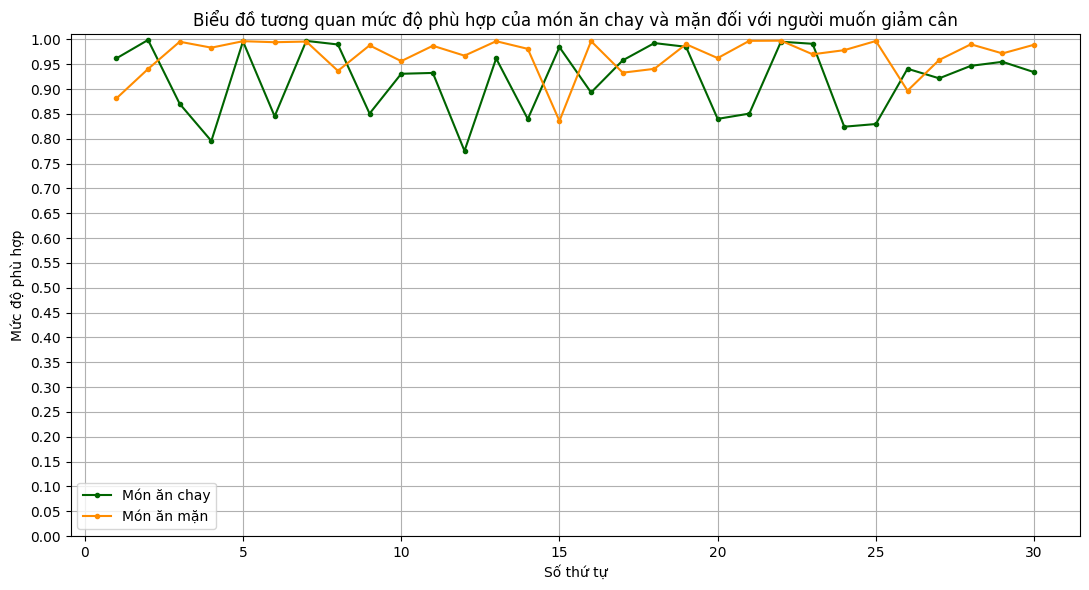

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Chọn ra ngẫu nhiên 30 món mặn và chay để lấy giá trị Health_Score_H1
sample_size = 30
sample_plant = calculated_plant_food_df['Health_Score_H1'].sample(n=sample_size, random_state=42).reset_index(drop=True)
sample_meat = calculated_meat_food_df['Health_Score_H1'].sample(n=sample_size, random_state=42).reset_index(drop=True)


data1 = {
    'X': range(1, sample_size + 1),
    'Y': sample_plant
}
df1 = pd.DataFrame(data1)

data2 = {
    'X': range(1, sample_size + 1),
    'Y': sample_meat
}
df2 = pd.DataFrame(data2)

# Vẽ biểu đồ đường
plt.figure(figsize=(11, 6))
plt.plot(df1['X'], df1['Y'], label='Món ăn chay', marker='o', color='darkgreen', markersize=3)
plt.plot(df2['X'], df2['Y'], label='Món ăn mặn', marker='o', color='darkorange', markersize=3)

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ tương quan mức độ phù hợp của món ăn chay và mặn đối với người muốn giảm cân')
plt.xlabel('Số thứ tự')
plt.ylabel('Mức độ phù hợp')

# Đặt các đường chia trục Y với khoảng cách là 0.05
plt.yticks([i/20 for i in range(21)])  # Tạo danh sách từ 0 đến 1, với bước là 0.05

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.tight_layout()
plt.show()


VẼ BIỂU ĐỒ TRỰC QUAN CHO GIẢ THUYẾT 2

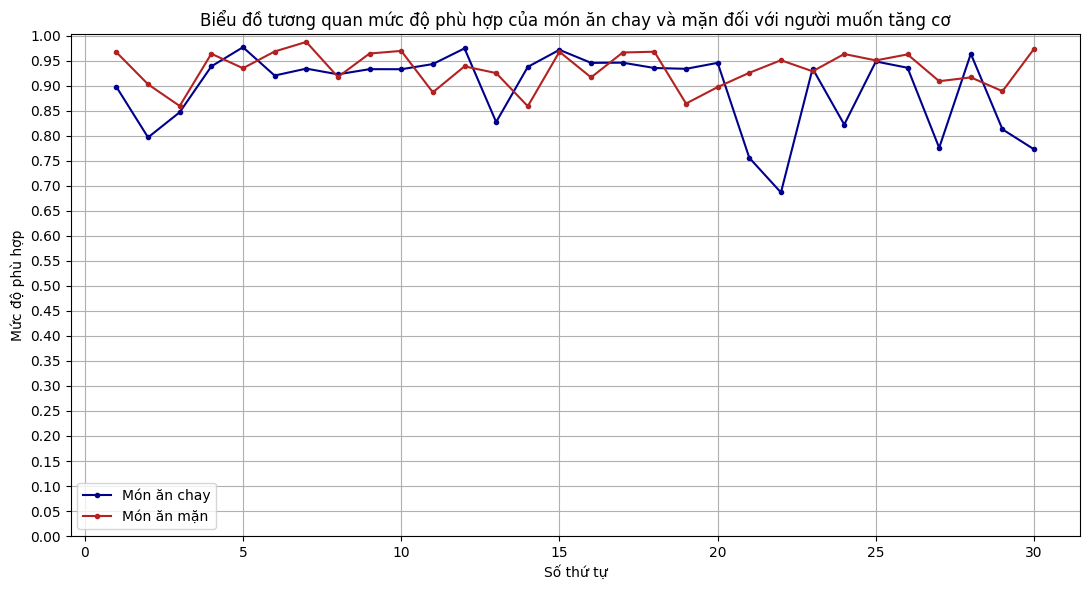

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Chọn ra ngẫu nhiên 30 món mặn và chay để lấy giá trị Health_Score_H2
sample_size = 30
sample_plant2 = calculated_plant_food_df['Health_Score_H2'].sample(n=sample_size, random_state=30).reset_index(drop=True)
sample_meat2 = calculated_meat_food_df['Health_Score_H2'].sample(n=sample_size, random_state=30).reset_index(drop=True)

data1 = {
    'X': range(1, sample_size + 1),
    'Y': sample_plant2
}
df1 = pd.DataFrame(data1)

data2 = {
    'X': range(1, sample_size + 1),
    'Y': sample_meat2
}
df2 = pd.DataFrame(data2)

# Vẽ biểu đồ đường
plt.figure(figsize=(11, 6))
plt.plot(df1['X'], df1['Y'], label='Món ăn chay', marker='o', color='darkblue', markersize=3)
plt.plot(df2['X'], df2['Y'], label='Món ăn mặn', marker='o', color='firebrick', markersize=3)

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ tương quan mức độ phù hợp của món ăn chay và mặn đối với người muốn tăng cơ')
plt.xlabel('Số thứ tự')
plt.ylabel('Mức độ phù hợp')

# Đặt các đường chia trục Y với khoảng cách là 0.05
plt.yticks([i/20 for i in range(21)])  # Tạo danh sách từ 0 đến 1, với bước là 0.05

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
from sklearn.linear_model import LogisticRegression
combined_df=combined_nutrition

# Define the independent variables for propensity score estimation
X = combined_df[['calories', 'sugar_g', 'fiber_g', 'sodium_mg', 'potassium_mg', 'fat_saturated_g', 'fat_total_g', 'cholesterol_mg', 'protein_g', 'carbohydrates_total_g']]
y = combined_df['food_type']

# Fit a logistic regression model
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X, y)

# Get the propensity scores
combined_df['propensity_score'] = logistic.predict_proba(X)[:, 1]

# Display the first few rows with propensity scores
print("Combined Data with Propensity Scores:")
print(combined_df.head())


Combined Data with Propensity Scores:
                          name    calories    sugar_g   fiber_g    sodium_mg  \
0           Chocolate Mug Cake  213.186356   7.291419  1.675778   657.000238   
1   How To Make Cinnamon Rolls  244.996330  12.043447  0.761227    98.505551   
2           Scalloped Potatoes  133.827072   0.687071  3.908272    98.688320   
3  Easy One-Pot Mac ‘n’ Cheese  125.971028   3.768685  2.019969  2272.060945   
4                  Ratatouille   59.717152   2.872961  2.999338  2254.361818   

   potassium_mg  fat_saturated_g  fat_total_g  cholesterol_mg  protein_g  \
0    225.338721         0.974566     5.823627        3.565486   5.710720   
1     83.979387         7.081505    11.617439       31.601391   4.431178   
2     92.620684         1.213527     2.186134        5.086107   4.577496   
3     87.031800         4.940267     8.276101       22.392797   4.213078   
4     30.751637         0.421255     2.690417        0.000000   1.583920   

   carbohydrates_total_g

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
